In [137]:
import pandas as pd
from matplotlib import pyplot as plt

In [138]:
players=pd.read_csv('Cleaned_datasets/Players.csv')
players.head()

,Player ID,Player Name,Batting Style,Bowling Style,Playing Role,Test Batting Pos,ODI Batting Pos,T20I Batting Pos,Bowling Type
0,35320,Sachin Ramesh Tendulkar,Right hand Bat,"Right arm Offbreak, Legbreak Googly",Top order Batter,Middle Order,Openers,Openers,Spin
1,253802,Virat Kohli,Right hand Bat,Right arm Medium,Top order Batter,Middle Order,Top Order,Top Order,Right-arm Pacer
2,28114,Rahul Sharad Dravid,Right hand Bat,Right arm Offbreak,Top order Batter,Top Order,Top Order,Top Order,Spin
3,34102,Rohit Gurunath Sharma,Right hand Bat,Right arm Offbreak,Top order Batter,Openers,Openers,Openers,Spin
4,28779,Sourav Chandidas Ganguly,Left hand Bat,Right arm Medium,Batter,Middle Order,Openers,NaN,Right-arm Pacer


In [139]:
df1=pd.read_excel('Cleaned_datasets/T20.xlsx')
df1.head()

,Player ID,Matches,Innings,Runs,Avg,SR,100,50,4s,6s
0,34102,159,151,4231,32.05,140.89,5,32,383,205
1,253802,125,117,4188,48.69,137.04,1,38,369,124
2,446507,83,79,2598,38.20,167.07,4,21,237,146
3,422108,72,68,2265,37.75,139.12,2,22,191,99
4,625371,114,90,1812,27.87,141.67,0,5,135,95


In [140]:
batsmen=players[['Player ID','Player Name','Playing Role','T20I Batting Pos']].merge(df1,on='Player ID',how='right')

In [141]:
batsmen.head(10)

,Player ID,Player Name,Playing Role,T20I Batting Pos,Matches,Innings,Runs,Avg,SR,100,50,4s,6s
0,34102,Rohit Gurunath Sharma,Top order Batter,Openers,159,151,4231,32.05,140.89,5,32,383,205
1,253802,Virat Kohli,Top order Batter,Top Order,125,117,4188,48.69,137.04,1,38,369,124
2,446507,Suryakumar Ashok Yadav,Batter,Middle Order,83,79,2598,38.20,167.07,4,21,237,146
3,422108,Kannaur Lokesh Rahul,Wicketkeeper Batter,Openers,72,68,2265,37.75,139.12,2,22,191,99
4,625371,Hardik Himanshu Pandya,Allrounder,Middle Order,114,90,1812,27.87,141.67,0,5,135,95
5,28235,Shikhar Dhawan,Opening Batter,Openers,68,66,1759,27.92,126.36,0,11,191,50
6,28081,Mahendra Singh Dhoni,Wicketkeeper Batter,Middle Order,98,85,1617,37.60,126.13,0,2,116,52
7,33335,Suresh Kumar Raina,Middle order Batter,Middle Order,78,66,1605,29.18,134.87,1,5,145,58
8,931581,Rishabh Rajendra Pant,Wicketkeeper Batter,Middle Order,76,66,1209,23.25,127.26,0,3,111,44
9,36084,Yuvraj Singh,Middle order Batter,Middle Order,58,51,1177,28.02,136.38,0,8,77,74


In [142]:
batsmen.columns

Index(['Player ID', 'Player Name', 'Playing Role', 'T20I Batting Pos',
       'Matches', 'Innings', 'Runs', 'Avg', 'SR', '100', '50', '4s', '6s'],
      dtype='object')

In [143]:
batsmen['Runs Score']=((batsmen['Runs']/1600)*100).clip(upper=100)
batsmen['Avg Score']=((batsmen['Avg']/25)*100).clip(upper=100)
batsmen['100 Score']=((batsmen['100']/1)*100).clip(upper=100)
batsmen['SR Score']=((batsmen['SR']/130)*100).clip(upper=100)
batsmen['50 Score']=((batsmen['50']/10*100)).clip(upper=100)
batsmen['BP Pct']=((batsmen['4s']*4 + batsmen['6s']*6)/batsmen['Runs']*100).clip(upper=100)
batsmen['BP Score']=((batsmen['BP Pct']/60)*100).clip(upper=100)
batsmen['Batting Score']=(0.20*batsmen['Runs Score'])+(0.20*batsmen['Avg Score'])+(0.30*batsmen['SR Score'])+(0.05*batsmen['50 Score'])+(0.25*batsmen['BP Score'])

In [144]:
batsmen.head()

,Player ID,Player Name,Playing Role,T20I Batting Pos,Matches,Innings,Runs,Avg,SR,100,...,4s,6s,Runs Score,Avg Score,100 Score,SR Score,50 Score,BP Pct,BP Score,Batting Score
0,34102,Rohit Gurunath Sharma,Top order Batter,Openers,159,151,4231,32.05,140.89,5,...,383,205,100.0,100.0,100.0,100.0,100.0,65.280076,100.000000,100.000000
1,253802,Virat Kohli,Top order Batter,Top Order,125,117,4188,48.69,137.04,1,...,369,124,100.0,100.0,100.0,100.0,100.0,53.008596,88.347660,97.086915
2,446507,Suryakumar Ashok Yadav,Batter,Middle Order,83,79,2598,38.20,167.07,4,...,237,146,100.0,100.0,100.0,100.0,100.0,70.207852,100.000000,100.000000
3,422108,Kannaur Lokesh Rahul,Wicketkeeper Batter,Openers,72,68,2265,37.75,139.12,2,...,191,99,100.0,100.0,100.0,100.0,100.0,59.955850,99.926416,99.981604
4,625371,Hardik Himanshu Pandya,Allrounder,Middle Order,114,90,1812,27.87,141.67,0,...,135,95,100.0,100.0,0.0,100.0,50.0,61.258278,100.000000,97.500000


In [145]:
batsmen.sort_values('Batting Score',ascending=False).head(10)

,Player ID,Player Name,Playing Role,T20I Batting Pos,Matches,Innings,Runs,Avg,SR,100,...,4s,6s,Runs Score,Avg Score,100 Score,SR Score,50 Score,BP Pct,BP Score,Batting Score
0,34102,Rohit Gurunath Sharma,Top order Batter,Openers,159,151,4231,32.05,140.89,5,...,383,205,100.0000,100.0,100.0,100.000000,100.0,65.280076,100.000000,100.000000
2,446507,Suryakumar Ashok Yadav,Batter,Middle Order,83,79,2598,38.20,167.07,4,...,237,146,100.0000,100.0,100.0,100.000000,100.0,70.207852,100.000000,100.000000
3,422108,Kannaur Lokesh Rahul,Wicketkeeper Batter,Openers,72,68,2265,37.75,139.12,2,...,191,99,100.0000,100.0,100.0,100.000000,100.0,59.955850,99.926416,99.981604
5,28235,Shikhar Dhawan,Opening Batter,Openers,68,66,1759,27.92,126.36,0,...,191,50,100.0000,100.0,0.0,97.200000,100.0,60.488914,100.000000,99.160000
4,625371,Hardik Himanshu Pandya,Allrounder,Middle Order,114,90,1812,27.87,141.67,0,...,135,95,100.0000,100.0,0.0,100.000000,50.0,61.258278,100.000000,97.500000
1,253802,Virat Kohli,Top order Batter,Top Order,125,117,4188,48.69,137.04,1,...,369,124,100.0000,100.0,100.0,100.000000,100.0,53.008596,88.347660,97.086915
7,33335,Suresh Kumar Raina,Middle order Batter,Middle Order,78,66,1605,29.18,134.87,1,...,145,58,100.0000,100.0,100.0,100.000000,50.0,57.819315,96.365524,96.591381
9,36084,Yuvraj Singh,Middle order Batter,Middle Order,58,51,1177,28.02,136.38,0,...,77,74,73.5625,100.0,0.0,100.000000,80.0,63.891249,100.000000,93.712500
10,642519,Shreyas Santosh Iyer,Top order Batter,Middle Order,51,47,1104,30.66,136.12,0,...,90,44,69.0000,100.0,0.0,100.000000,80.0,56.521739,94.202899,91.350725
6,28081,Mahendra Singh Dhoni,Wicketkeeper Batter,Middle Order,98,85,1617,37.60,126.13,0,...,116,52,100.0000,100.0,0.0,97.023077,20.0,47.990105,79.983509,90.102800


In [146]:
openers=batsmen[batsmen['T20I Batting Pos']=='Openers'].head(10)

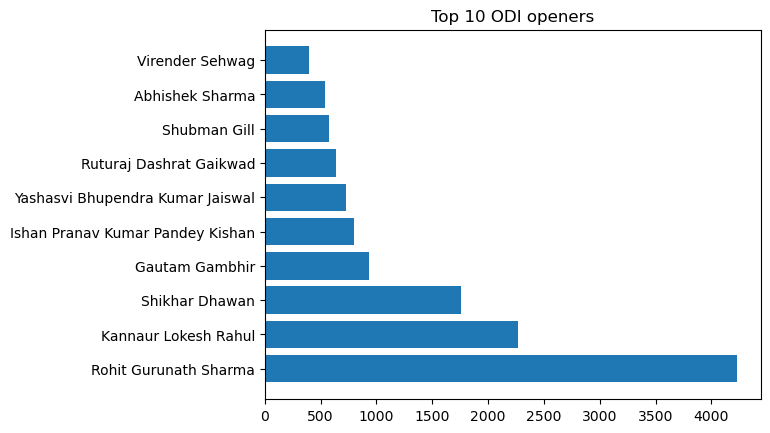

In [147]:
plt.title("Top 10 ODI openers")
plt.barh(openers['Player Name'],openers['Runs']);

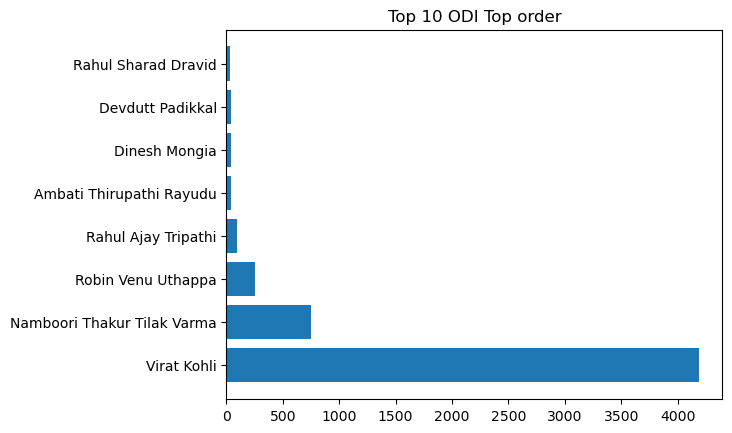

In [148]:
toporder=batsmen[batsmen['T20I Batting Pos']=='Top Order'].head(10)
plt.title("Top 10 ODI Top order")
plt.barh(toporder['Player Name'],toporder['Runs']);

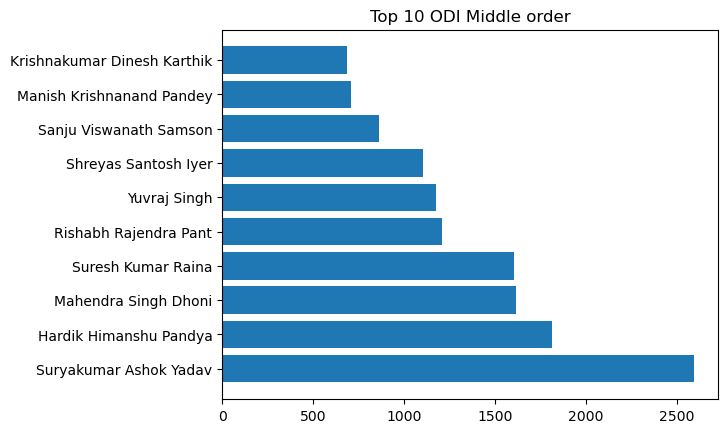

In [149]:
middleorder=batsmen[batsmen['T20I Batting Pos']=='Middle Order'].head(10)
plt.title("Top 10 ODI Middle order")
plt.barh(middleorder['Player Name'],middleorder['Runs']);

# Bowling

In [150]:
df3=pd.read_excel('Cleaned_datasets/T20.xlsx',sheet_name='Bowling')
df3.head()

,Player ID,Matches,Innings,Overs,Madeins,Wkts,Avg,Econ,SR,4,5
0,1125976,63,63,218.2,2,99,18.30,8.29,13.2,2,0
1,430246,80,79,294.0,2,96,25.09,8.19,18.3,2,1
2,625371,114,102,302.5,4,94,26.43,8.20,19.3,3,0
3,326016,87,86,298.3,10,90,23.10,6.96,19.9,3,2
4,625383,70,69,251.3,12,89,17.74,6.27,16.9,0,0


In [151]:
bowlers=players[['Player ID','Player Name','Bowling Style','Playing Role','Bowling Type']].merge(df3,on='Player ID',how='right')
bowlers.head()

,Player ID,Player Name,Bowling Style,Playing Role,Bowling Type,Matches,Innings,Overs,Madeins,Wkts,Avg,Econ,SR,4,5
0,1125976,Arshdeep Singh,Left arm Medium fast,Bowler,Left-arm Pacer,63,63,218.2,2,99,18.30,8.29,13.2,2,0
1,430246,Yuzvendra Singh Chahal,Legbreak Googly,Bowler,Spin,80,79,294.0,2,96,25.09,8.19,18.3,2,1
2,625371,Hardik Himanshu Pandya,Right arm Medium fast,Allrounder,Right-arm Pacer,114,102,302.5,4,94,26.43,8.20,19.3,3,0
3,326016,Bhuvneshwar Kumar Singh,Right arm Medium,Bowler,Right-arm Pacer,87,86,298.3,10,90,23.10,6.96,19.9,3,2
4,625383,Jasprit Jasbirsingh Bumrah,Right arm Fast,Bowler,Right-arm Pacer,70,69,251.3,12,89,17.74,6.27,16.9,0,0


In [152]:
bowlers.columns

Index(['Player ID', 'Player Name', 'Bowling Style', 'Playing Role',
       'Bowling Type', 'Matches', 'Innings', 'Overs', 'Madeins', 'Wkts', 'Avg',
       'Econ', 'SR', '4', '5'],
      dtype='object')

In [153]:
bowlers['Avg Score']=((20/bowlers['Avg'])*100).clip(upper=100)
bowlers['Econ Score']=((7/bowlers['Econ'])*100).clip(upper=100)
bowlers['SR Score']=((17/bowlers['SR'])*100).clip(upper=100)
bowlers['Wkts Score']=((bowlers['Wkts']/70)*100).clip(upper=100)
bowlers['5 Score']=((bowlers['5']/1)*100).clip(upper=100)
bowlers['4 Score']=((bowlers['4']/2)*100).clip(upper=100)
bowlers['Madeins Pct']=(bowlers['Madeins']/bowlers['Overs'])*100
bowlers['MP Score']=(bowlers['Madeins Pct']/2*100).clip(upper=100)

In [154]:
bowlers['Bowling Score']=(0.20*bowlers['Wkts Score'])+(0.15*bowlers['Avg Score'])+(0.2*bowlers['SR Score'])+(0.25*bowlers['Econ Score'])+(0.05*bowlers['5 Score'])

In [155]:
bowlers['Bowling Score'] = bowlers.apply(lambda row: row['Bowling Score'] if row['Innings'] >(row['Matches'] * 0.6) else 0, axis=1)

In [156]:
bowlers.sort_values('Bowling Score',ascending=False).head(10)

,Player ID,Player Name,Bowling Style,Playing Role,Bowling Type,Matches,Innings,Overs,Madeins,Wkts,...,5,Avg Score,Econ Score,SR Score,Wkts Score,5 Score,4 Score,Madeins Pct,MP Score,Bowling Score
7,559235,Kuldeep Yadav,Left arm Wrist spin,Bowler,Spin,40,39,143.2,2,69,...,2,100.000000,100.000000,100.000000,98.571429,100.0,50.0,1.396648,69.832402,84.714286
3,326016,Bhuvneshwar Kumar Singh,Right arm Medium,Bowler,Right-arm Pacer,87,86,298.3,10,90,...,2,86.580087,100.000000,85.427136,100.000000,100.0,100.0,3.352330,100.000000,80.072440
4,625383,Jasprit Jasbirsingh Bumrah,Right arm Fast,Bowler,Right-arm Pacer,70,69,251.3,12,89,...,0,100.000000,100.000000,100.000000,100.000000,0.0,0.0,4.775169,100.000000,80.000000
8,1175441,Ravi Bishnoi,Legbreak Googly,Bowler,Spin,42,42,160.4,3,61,...,0,100.000000,100.000000,100.000000,87.142857,0.0,100.0,1.870324,93.516209,77.428571
1,430246,Yuzvendra Singh Chahal,Legbreak Googly,Bowler,Spin,80,79,294.0,2,96,...,1,79.713033,85.470085,92.896175,100.000000,100.0,100.0,0.680272,34.013605,76.903711
6,554691,Axar Rajeshbhai Patel,Slow Left arm Orthodox,Allrounder,Spin,71,68,215.1,3,71,...,0,90.415913,95.890411,93.922652,100.000000,0.0,0.0,1.394700,69.735007,76.319520
0,1125976,Arshdeep Singh,Left arm Medium fast,Bowler,Left-arm Pacer,63,63,218.2,2,99,...,0,100.000000,84.439083,100.000000,100.000000,0.0,100.0,0.916590,45.829514,76.109771
5,26421,Ravichandran Ashwin,Right arm Offbreak,Bowling Allrounder,Spin,65,65,242.0,3,72,...,0,86.132644,100.000000,84.577114,100.000000,0.0,100.0,1.239669,61.983471,74.835320
13,1108375,Varun Chakravarthy Vinod,Legbreak Googly,Bowler,Spin,18,18,68.3,0,33,...,2,100.000000,99.715100,100.000000,47.142857,100.0,0.0,0.000000,0.000000,74.357346
2,625371,Hardik Himanshu Pandya,Right arm Medium fast,Allrounder,Right-arm Pacer,114,102,302.5,4,94,...,0,75.671585,85.365854,88.082902,100.000000,0.0,100.0,1.322314,66.115702,70.308782


# Fielding

In [157]:
df4=pd.read_excel('Cleaned_datasets/T20.xlsx',sheet_name='Fielding')
df4.head()

,Player ID,Matches,Dismissals,Ctaches,Stumps,Ct Wk,Ct Fi,D/I
0,28081,98,91,57,34,57,0,0.938
1,34102,159,65,65,0,0,65,0.408
2,253802,125,54,54,0,0,54,0.435
3,625371,114,54,54,0,0,54,0.477
4,931581,76,51,40,11,38,2,0.689


In [158]:
field=players[['Player ID','Player Name','Playing Role']].merge(df4,on='Player ID',how='right')
field.head()

,Player ID,Player Name,Playing Role,Matches,Dismissals,Ctaches,Stumps,Ct Wk,Ct Fi,D/I
0,28081,Mahendra Singh Dhoni,Wicketkeeper Batter,98,91,57,34,57,0,0.938
1,34102,Rohit Gurunath Sharma,Top order Batter,159,65,65,0,0,65,0.408
2,253802,Virat Kohli,Top order Batter,125,54,54,0,0,54,0.435
3,625371,Hardik Himanshu Pandya,Allrounder,114,54,54,0,0,54,0.477
4,931581,Rishabh Rajendra Pant,Wicketkeeper Batter,76,51,40,11,38,2,0.689


In [159]:
field['Stumpings Score'] = ((field['Stumps'] / 40) * 100).clip(upper=100)
field['Keeper Catches Score'] = ((field['Ct Wk'] / 100) * 100).clip(upper=100)
field['D/I keeper Score'] = ((field['D/I'] / 1.5) * 100).clip(upper=100)
field['Final Keeper Score'] = (((0.50 * field['Stumpings Score']) + (0.20 * field['D/I keeper Score']) + (0.30 * field['Keeper Catches Score']))).clip(upper=100)

In [160]:
field['D/I fielder Score'] = ((field['D/I'] / 0.5) * 100  ).clip(upper=100)
field['Fielding Catches Score'] = ((field['Ct Fi'] / 50) * 100).clip(upper=100)
field['Final Fielding Score'] = ( ((0.70 * field['Fielding Catches Score']) + (0.30 * field['D/I fielder Score']))).clip(upper=100)

In [161]:
field.head()

,Player ID,Player Name,Playing Role,Matches,Dismissals,Ctaches,Stumps,Ct Wk,Ct Fi,D/I,Stumpings Score,Keeper Catches Score,D/I keeper Score,Final Keeper Score,D/I fielder Score,Fielding Catches Score,Final Fielding Score
0,28081,Mahendra Singh Dhoni,Wicketkeeper Batter,98,91,57,34,57,0,0.938,85.0,57.0,62.533333,72.106667,100.0,0.0,30.00
1,34102,Rohit Gurunath Sharma,Top order Batter,159,65,65,0,0,65,0.408,0.0,0.0,27.200000,5.440000,81.6,100.0,94.48
2,253802,Virat Kohli,Top order Batter,125,54,54,0,0,54,0.435,0.0,0.0,29.000000,5.800000,87.0,100.0,96.10
3,625371,Hardik Himanshu Pandya,Allrounder,114,54,54,0,0,54,0.477,0.0,0.0,31.800000,6.360000,95.4,100.0,98.62
4,931581,Rishabh Rajendra Pant,Wicketkeeper Batter,76,51,40,11,38,2,0.689,27.5,38.0,45.933333,34.336667,100.0,4.0,32.80


In [162]:
field.sort_values('Final Fielding Score',ascending=False)[field['Matches']>50]

C:\Users\vighn\AppData\Local\Temp\ipykernel_14112\5964327.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  field.sort_values('Final Fielding Score',ascending=False)[field['Matches']>50]


,Player ID,Player Name,Playing Role,Matches,Dismissals,Ctaches,Stumps,Ct Wk,Ct Fi,D/I,Stumpings Score,Keeper Catches Score,D/I keeper Score,Final Keeper Score,D/I fielder Score,Fielding Catches Score,Final Fielding Score
5,446507,Suryakumar Ashok Yadav,Batter,83,50,50,0,0,50,0.602,0.0,0.0,40.133333,8.026667,100.0,100.0,100.00
3,625371,Hardik Himanshu Pandya,Allrounder,114,54,54,0,0,54,0.477,0.0,0.0,31.800000,6.360000,95.4,100.0,98.62
2,253802,Virat Kohli,Top order Batter,125,54,54,0,0,54,0.435,0.0,0.0,29.000000,5.800000,87.0,100.0,96.10
1,34102,Rohit Gurunath Sharma,Top order Batter,159,65,65,0,0,65,0.408,0.0,0.0,27.200000,5.440000,81.6,100.0,94.48
6,33335,Suresh Kumar Raina,Middle order Batter,78,42,42,0,0,42,0.538,0.0,0.0,35.866667,7.173333,100.0,84.0,88.80
9,234675,Ravindrasinh Anirudhsinh Jadeja,Allrounder,74,38,38,0,0,38,0.478,0.0,0.0,31.866667,6.373333,95.6,76.0,81.88
10,554691,Axar Rajeshbhai Patel,Allrounder,71,25,25,0,0,25,0.357,0.0,0.0,23.800000,4.760000,71.4,50.0,56.42
14,719715,Washington Sundar,Bowling Allrounder,54,19,19,0,0,19,0.358,0.0,0.0,23.866667,4.773333,71.6,38.0,48.08
11,422108,Kannaur Lokesh Rahul,Wicketkeeper Batter,72,24,23,1,4,19,0.338,2.5,4.0,22.533333,6.956667,67.6,38.0,46.88
7,30045,Krishnakumar Dinesh Karthik,Wicketkeeper Batter,59,38,30,8,19,11,0.666,20.0,19.0,44.400000,24.580000,100.0,22.0,45.40


In [163]:
allround=batsmen[['Player ID','Player Name','Playing Role','T20I Batting Pos','Batting Score']].merge(bowlers[['Player ID','Bowling Type','Bowling Score']],on='Player ID',how='outer').merge(
    field[['Player ID','Final Keeper Score','Final Fielding Score']],on='Player ID',how='outer'
)

In [164]:
allround.fillna(0,inplace=True)

In [165]:
allround['Allround Score']=((0.5*(allround['Batting Score'])) + (0.5*(allround['Bowling Score'])))

In [166]:
allround.sort_values('Allround Score',ascending=False).head(10)

,Player ID,Player Name,Playing Role,T20I Batting Pos,Batting Score,Bowling Type,Bowling Score,Final Keeper Score,Final Fielding Score,Allround Score
77,625371,Hardik Himanshu Pandya,Allrounder,Middle Order,97.500000,Right-arm Pacer,70.308782,6.360000,98.62,83.904391
73,554691,Axar Rajeshbhai Patel,Allrounder,Middle Order,72.209500,Spin,76.319520,4.760000,56.42,74.264510
1,26421,Ravichandran Ashwin,Bowling Allrounder,Tail,69.671795,Spin,74.835320,2.253333,25.54,72.253557
64,447261,Deepak Lokandersingh Chahar,Bowler,Tail,75.662500,Right-arm Pacer,66.935010,1.066667,7.60,71.298755
38,234675,Ravindrasinh Anirudhsinh Jadeja,Allrounder,Middle Order,73.947663,Spin,68.266841,6.373333,81.88,71.107252
113,1175441,Ravi Bishnoi,Bowler,Tail,61.967500,Spin,77.428571,4.760000,42.42,69.698036
66,475281,Shardul Narendra Thakur,Bowler,Tail,74.262500,Right-arm Pacer,61.380249,3.880000,27.26,67.821374
107,1125976,Arshdeep Singh,Bowler,Tail,59.490618,Left-arm Pacer,76.109771,3.373333,37.58,67.800194
83,719715,Washington Sundar,Bowling Allrounder,Tail,66.947269,Spin,68.229012,4.773333,48.08,67.588140
23,32685,Irfan Khan Pathan,Allrounder,Middle Order,68.264426,Left-arm Pacer,63.413562,1.146667,7.96,65.838994


In [167]:
allround['Batsmen Score']=(0.9*allround['Batting Score'])+(0.1*allround['Final Fielding Score'])

In [168]:
allround.sort_values('Batsmen Score',ascending=False).head(10).reset_index()

,index,Player ID,Player Name,Playing Role,T20I Batting Pos,Batting Score,Bowling Type,Bowling Score,Final Keeper Score,Final Fielding Score,Allround Score,Batsmen Score
0,62,446507,Suryakumar Ashok Yadav,Batter,Middle Order,100.000000,All-rounder (Pace & Spin),0.000000,8.026667,100.00,50.000000,100.000000
1,28,34102,Rohit Gurunath Sharma,Top order Batter,Openers,100.000000,Spin,0.000000,5.440000,94.48,50.000000,99.448000
2,77,625371,Hardik Himanshu Pandya,Allrounder,Middle Order,97.500000,Right-arm Pacer,70.308782,6.360000,98.62,83.904391,97.612000
3,41,253802,Virat Kohli,Top order Batter,Top Order,97.086915,Right-arm Pacer,0.000000,5.800000,96.10,48.543457,96.988223
4,27,33335,Suresh Kumar Raina,Middle order Batter,Middle Order,96.591381,Spin,0.000000,7.173333,88.80,48.295691,95.812243
5,58,422108,Kannaur Lokesh Rahul,Wicketkeeper Batter,Openers,99.981604,0,0.000000,6.956667,46.88,49.990802,94.671444
6,7,28235,Shikhar Dhawan,Opening Batter,Openers,99.160000,0,0.000000,3.773333,43.58,49.580000,93.602000
7,36,36084,Yuvraj Singh,Middle order Batter,Middle Order,93.712500,Spin,0.000000,2.800000,29.40,46.856250,87.281250
8,79,642519,Shreyas Santosh Iyer,Top order Batter,Middle Order,91.350725,0,0.000000,4.346667,41.96,45.675362,86.411652
9,5,28081,Mahendra Singh Dhoni,Wicketkeeper Batter,Middle Order,90.102800,0,0.000000,72.106667,30.00,45.051400,84.092520


In [169]:
allround['Bowler Score']=(0.95*allround['Bowling Score'])+(0.05*allround['Final Fielding Score'])

In [170]:
allround.sort_values('Bowler Score',ascending=False).head(10).reset_index()

,index,Player ID,Player Name,Playing Role,T20I Batting Pos,Batting Score,Bowling Type,Bowling Score,Final Keeper Score,Final Fielding Score,Allround Score,Batsmen Score,Bowler Score
0,74,559235,Kuldeep Yadav,Bowler,Tail,35.012146,Spin,84.714286,4.093333,35.22,59.863216,35.032931,82.239571
1,51,326016,Bhuvneshwar Kumar Singh,Bowler,Tail,23.980423,Right-arm Pacer,80.072440,2.320000,31.44,52.026432,24.726381,77.640818
2,78,625383,Jasprit Jasbirsingh Bumrah,Bowler,Tail,36.247487,Right-arm Pacer,80.000000,1.733333,20.40,58.123744,34.662738,77.020000
3,113,1175441,Ravi Bishnoi,Bowler,Tail,61.967500,Spin,77.428571,4.760000,42.42,69.698036,60.012750,75.678143
4,73,554691,Axar Rajeshbhai Patel,Allrounder,Middle Order,72.209500,Spin,76.319520,4.760000,56.42,74.264510,70.630550,75.324544
5,60,430246,Yuzvendra Singh Chahal,Bowler,Tail,13.125000,Spin,76.903711,2.360000,30.22,45.014356,14.834500,74.569526
6,107,1125976,Arshdeep Singh,Bowler,Tail,59.490618,Left-arm Pacer,76.109771,3.373333,37.58,67.800194,57.299556,74.183282
7,1,26421,Ravichandran Ashwin,Bowling Allrounder,Tail,69.671795,Spin,74.835320,2.253333,25.54,72.253557,65.258615,72.370554
8,77,625371,Hardik Himanshu Pandya,Allrounder,Middle Order,97.500000,Right-arm Pacer,70.308782,6.360000,98.62,83.904391,97.612000,71.724342
9,105,1108375,Varun Chakravarthy Vinod,Bowler,Tail,4.257115,Spin,74.357346,2.213333,14.16,39.307231,5.247404,71.347479


In [171]:
allround['Allrounder Score']=(0.8*allround['Allround Score'])+(0.2*allround['Final Fielding Score'])

In [172]:
allround.sort_values('Allrounder Score',ascending=False).head(10).reset_index(drop=True)

,Player ID,Player Name,Playing Role,T20I Batting Pos,Batting Score,Bowling Type,Bowling Score,Final Keeper Score,Final Fielding Score,Allround Score,Batsmen Score,Bowler Score,Allrounder Score
0,625371,Hardik Himanshu Pandya,Allrounder,Middle Order,97.500000,Right-arm Pacer,70.308782,6.360000,98.62,83.904391,97.612000,71.724342,86.847513
1,234675,Ravindrasinh Anirudhsinh Jadeja,Allrounder,Middle Order,73.947663,Spin,68.266841,6.373333,81.88,71.107252,74.740896,68.947499,73.261801
2,554691,Axar Rajeshbhai Patel,Allrounder,Middle Order,72.209500,Spin,76.319520,4.760000,56.42,74.264510,70.630550,75.324544,70.695608
3,1175441,Ravi Bishnoi,Bowler,Tail,61.967500,Spin,77.428571,4.760000,42.42,69.698036,60.012750,75.678143,64.242429
4,719715,Washington Sundar,Bowling Allrounder,Tail,66.947269,Spin,68.229012,4.773333,48.08,67.588140,65.060542,67.221561,63.686512
5,26421,Ravichandran Ashwin,Bowling Allrounder,Tail,69.671795,Spin,74.835320,2.253333,25.54,72.253557,65.258615,72.370554,62.910846
6,1125976,Arshdeep Singh,Bowler,Tail,59.490618,Left-arm Pacer,76.109771,3.373333,37.58,67.800194,57.299556,74.183282,61.756156
7,714451,Shivam Dube,Allrounder,Middle Order,83.433482,Right-arm Pacer,46.700223,5.480000,44.26,65.066853,79.516134,46.578212,60.905482
8,446507,Suryakumar Ashok Yadav,Batter,Middle Order,100.000000,All-rounder (Pace & Spin),0.000000,8.026667,100.00,50.000000,100.000000,5.000000,60.000000
9,475281,Shardul Narendra Thakur,Bowler,Tail,74.262500,Right-arm Pacer,61.380249,3.880000,27.26,67.821374,69.562250,59.674236,59.709099


In [173]:
allround['Keeper Score']=(0.7*allround['Final Keeper Score'])+(0.3*allround['Batting Score'])

In [174]:
allround.sort_values('Keeper Score',ascending=False).head(10).reset_index()

,index,Player ID,Player Name,Playing Role,T20I Batting Pos,Batting Score,Bowling Type,Bowling Score,Final Keeper Score,Final Fielding Score,Allround Score,Batsmen Score,Bowler Score,Allrounder Score,Keeper Score
0,5,28081,Mahendra Singh Dhoni,Wicketkeeper Batter,Middle Order,90.102800,0,0.000000,72.106667,30.00,45.051400,84.092520,1.500000,42.041120,77.505507
1,92,931581,Rishabh Rajendra Pant,Wicketkeeper Batter,Middle Order,88.980523,0,0.000000,34.336667,32.80,44.490262,83.362471,1.640000,42.152209,50.729824
2,11,30045,Krishnakumar Dinesh Karthik,Wicketkeeper Batter,Middle Order,84.075000,0,0.000000,24.580000,45.40,42.037500,80.207500,2.270000,42.710000,42.428500
3,59,425943,Sanju Viswanath Samson,Wicketkeeper Batter,Middle Order,86.762500,0,0.000000,23.066667,44.00,43.381250,82.486250,2.200000,43.505000,42.175417
4,62,446507,Suryakumar Ashok Yadav,Batter,Middle Order,100.000000,All-rounder (Pace & Spin),0.000000,8.026667,100.00,50.000000,100.000000,5.000000,60.000000,35.618667
5,84,720471,Ishan Pranav Kumar Pandey Kishan,Wicketkeeper Batter,Openers,86.650769,0,0.000000,13.330000,35.60,43.325385,81.545692,1.780000,41.780308,35.326231
6,58,422108,Kannaur Lokesh Rahul,Wicketkeeper Batter,Openers,99.981604,0,0.000000,6.956667,46.88,49.990802,94.671444,2.344000,49.368642,34.864148
7,27,33335,Suresh Kumar Raina,Middle order Batter,Middle Order,96.591381,Spin,0.000000,7.173333,88.80,48.295691,95.812243,4.440000,56.396552,33.998748
8,28,34102,Rohit Gurunath Sharma,Top order Batter,Openers,100.000000,Spin,0.000000,5.440000,94.48,50.000000,99.448000,4.724000,58.896000,33.808000
9,77,625371,Hardik Himanshu Pandya,Allrounder,Middle Order,97.500000,Right-arm Pacer,70.308782,6.360000,98.62,83.904391,97.612000,71.724342,86.847513,33.702000


In [175]:
allround.head()

,Player ID,Player Name,Playing Role,T20I Batting Pos,Batting Score,Bowling Type,Bowling Score,Final Keeper Score,Final Fielding Score,Allround Score,Batsmen Score,Bowler Score,Allrounder Score,Keeper Score
0,26184,Ajit Bhalchandra Agarkar,Bowler,Tail,58.409722,Right-arm Pacer,49.268744,0.000000,0.00,53.839233,52.568750,46.805307,43.071387,17.522917
1,26421,Ravichandran Ashwin,Bowling Allrounder,Tail,69.671795,Spin,74.835320,2.253333,25.54,72.253557,65.258615,72.370554,62.910846,22.478872
2,26806,Subramaniam Badrinath,Middle order Batter,Middle Order,66.735037,0,0.000000,0.000000,0.00,33.367519,60.061534,0.000000,26.694015,20.020511
3,26829,0,0,0,0.000000,Right-arm Pacer,61.005291,0.000000,0.00,30.502646,0.000000,57.955026,24.402116,0.000000
4,27223,Stuart Terence Roger Binny,Allrounder,Middle Order,58.953397,Right-arm Pacer,33.378307,0.000000,0.00,46.165852,53.058058,31.709392,36.932682,17.686019


In [176]:
allround.drop(['Player Name','Playing Role','T20I Batting Pos','Bowling Type'],axis=1,inplace=True)

In [177]:
allround.to_csv('T20_Score.csv')